# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from sklearn.cluster import MiniBatchKMeans

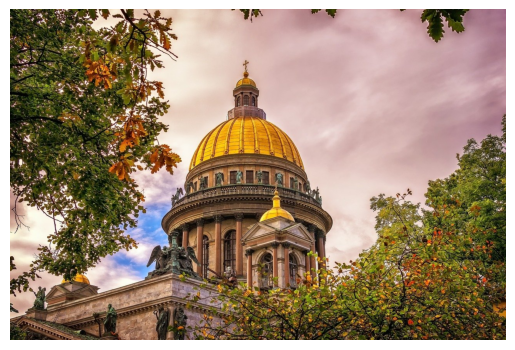

In [ ]:
# Путь к изображению
img_path = 'spb_st_isaacs.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [ ]:
# посмотрим на форму массива с данными
shape = img.shape
print(f'Image shape: {shape}')

Image shape: (853, 1280, 3)


In [ ]:
# вычислим среднее значение интенсивности пикселей по всем каналам
print(f'Среднее значение интенсивности пикселей: {round(img.mean(), 3)}')

Среднее значение интенсивности пикселей: 123.058


Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [ ]:
# нормируем значения интенсивностей пикселей, разделив все значения на  255
img = img / 255

In [ ]:
# вычислим среднее значение интенсивности пикселей по всем каналам после преобразования
print(f'Среднее значение интенсивности пикселей: {round(img.mean(), 3)}')

Среднее значение интенсивности пикселей: 0.483


Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [ ]:
# распрямим изображение
height, width, _ = shape
img = img.reshape((height * width, 3))
print(f'Image shape: {img.shape}')

Image shape: (1091840, 3)


In [ ]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

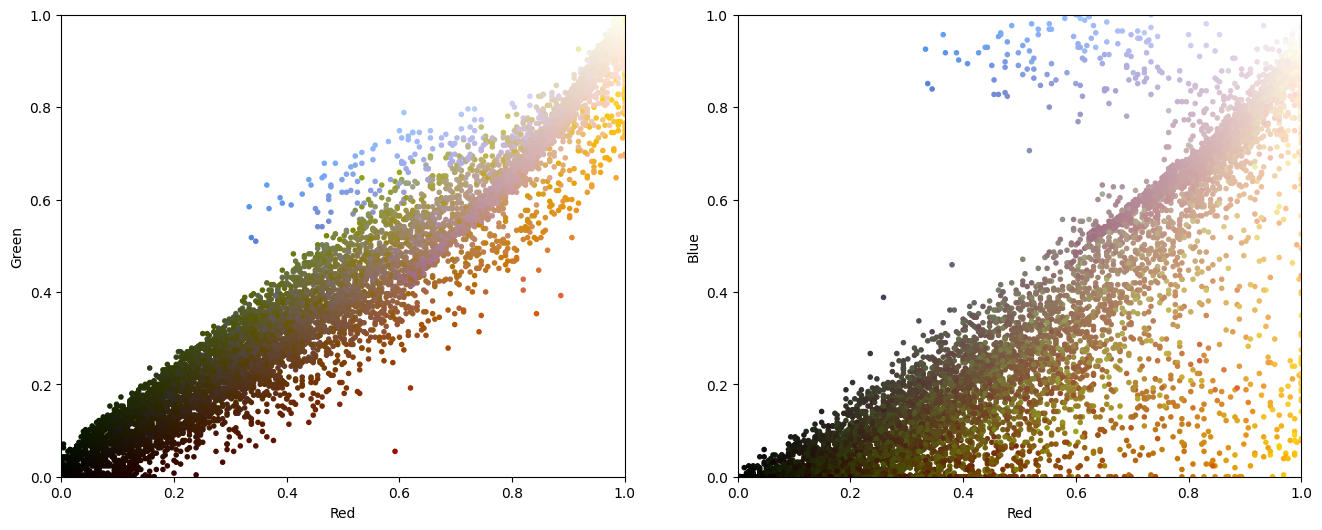

In [ ]:
plot_pixels(img)

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [ ]:
# обучим модель MiniBatchKMeans с параметрами n_clusters=16, random_state=14
mini_kmeans = MiniBatchKMeans(n_clusters=16, random_state=14).fit(img)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


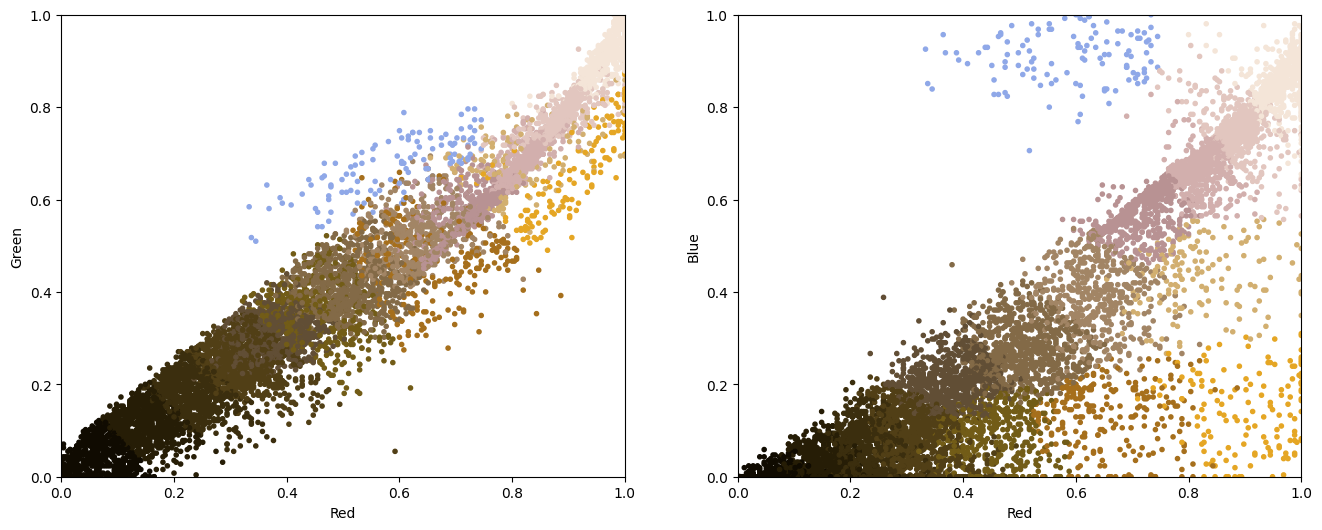

In [ ]:
# построим графики зависимостей цветов при помощи plot_pixels()
labels = mini_kmeans.labels_
centroids = mini_kmeans.cluster_centers_
new_colors = centroids[labels] # для кажого пикселя берем цвет соответствующий центроиду его кластера

plot_pixels(img, colors=new_colors)

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [ ]:
# получим изображение после кластеризации
new_img = new_colors.reshape((height, width, 3))

In [ ]:
# вычислим среднее значение интенсивности пикселей полученного изображения
print(f'Среднее значение интенсивности пикселей: {round(new_img.mean(), 3)}')

Среднее значение интенсивности пикселей: 0.482


Выберите номер изображения, соответствующего палитре из $16$ цветов.

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

In [ ]:
# вернем форму исходному изображению
img = img.reshape((height, width, 3))

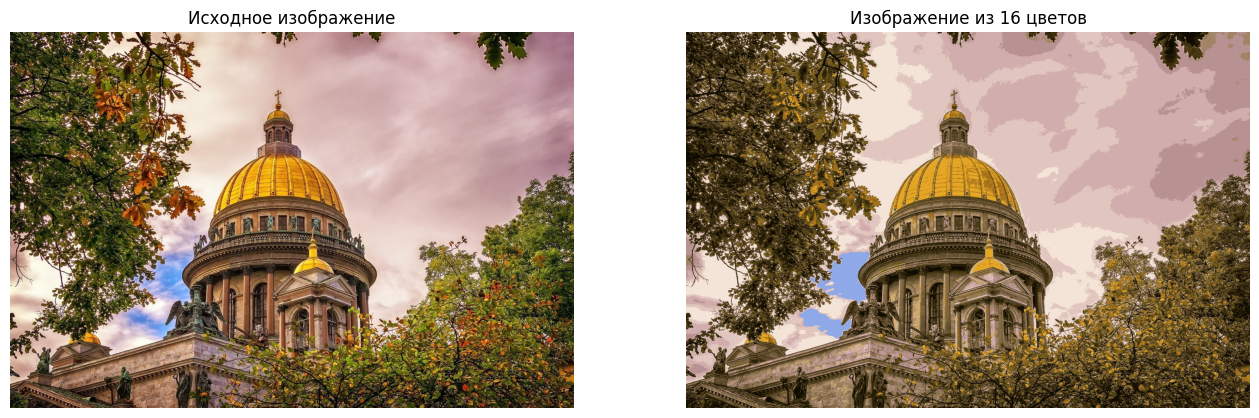

In [ ]:
# построим оригинальное и новое изображения рядом
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].imshow(img)
ax[0].set_title('Исходное изображение')
ax[0].axis('off')

ax[1].imshow(new_img)
ax[1].set_title('Изображение из 16 цветов')
ax[1].axis('off')

plt.show()

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

In [ ]:
# сформируем изображение размером 4x4
x4 = centroids.reshape((4, 4, 3))

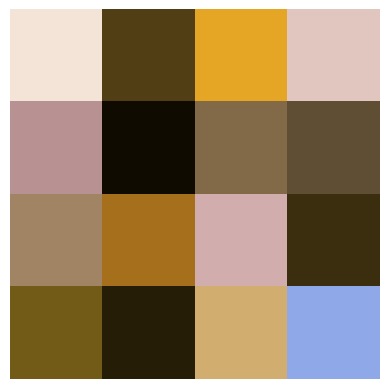

In [ ]:
# построим изображение
plt.imshow(x4)
plt.axis('off')
plt.show()